In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [33]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [34]:
df=pd.read_csv('../data/Season_2016_21_fav_win.csv').drop('Unnamed: 0',axis=1)

In [35]:
n = 80
df=df.head(int(len(df)*(n/100)))

In [36]:
df

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,A_median_odds,home_win,home_fav,fav_win
0,PIT,33.796318,4.233602,8.424626,4.031070,3.971922,3.078251,7.860759,37.753740,0.243908,...,0.009060,50.917327,1.501144,0.496568,-0.009200,-0.155946,-131.0,1,0,0
1,KCR,33.912644,4.183908,8.535632,3.959770,3.978080,2.583908,7.919540,37.258621,0.246775,...,0.001148,51.851894,1.439166,0.443801,0.023777,0.027784,-123.0,1,0,0
2,TBR,33.897664,4.559511,8.357063,4.333704,4.346240,3.327030,9.320356,38.014461,0.241341,...,0.006810,50.852440,1.396571,0.454857,0.017824,0.040976,-141.0,0,0,1
3,OAK,33.789534,4.676906,8.269625,4.463026,4.483174,3.356086,8.316268,37.895336,0.239340,...,0.009174,51.178899,1.401170,0.416374,0.018536,0.161583,-102.0,0,0,1
4,LAA,33.696552,4.517241,8.328736,4.324138,4.299092,3.208046,7.639080,37.688506,0.241741,...,0.004415,50.486755,1.472284,0.465632,0.004262,-0.187307,-176.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,TBR,33.897664,4.559511,8.357063,4.333704,4.346240,3.327030,9.320356,38.014461,0.241341,...,0.003308,49.253583,1.582123,0.499441,-0.006501,-0.297905,-155.0,0,0,1
10616,COL,34.242597,4.920273,8.998861,4.719818,4.741708,3.051253,8.671982,38.126424,0.257548,...,0.002275,50.781570,1.565865,0.498282,-0.012315,-0.111490,115.0,0,1,0
10617,SDP,33.333333,4.183790,7.929224,3.987443,3.950616,3.076484,9.109589,37.215753,0.233220,...,0.000000,49.631356,1.570213,0.527660,-0.036076,-0.496186,-148.0,0,0,1
10618,MIL,33.489290,4.463360,8.149944,4.252537,4.296144,3.565953,9.419391,37.871477,0.238328,...,0.009060,50.917327,1.501144,0.496568,-0.009200,-0.155946,-131.0,0,0,1


In [37]:
df2=pd.read_csv('../data/Season_2021.csv').drop('Unnamed: 0',axis=1)

In [38]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [39]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [40]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,A_median_odds,home_win,home_fav,fav_win
0,PIT,33.796318,4.233602,8.424626,4.031070,3.971922,3.078251,7.860759,37.753740,0.243908,...,0.009060,50.917327,1.501144,0.496568,-0.009200,-0.155946,-131.0,1,0,0
1,KCR,33.912644,4.183908,8.535632,3.959770,3.978080,2.583908,7.919540,37.258621,0.246775,...,0.001148,51.851894,1.439166,0.443801,0.023777,0.027784,-123.0,1,0,0
2,TBR,33.897664,4.559511,8.357063,4.333704,4.346240,3.327030,9.320356,38.014461,0.241341,...,0.006810,50.852440,1.396571,0.454857,0.017824,0.040976,-141.0,0,0,1
3,OAK,33.789534,4.676906,8.269625,4.463026,4.483174,3.356086,8.316268,37.895336,0.239340,...,0.009174,51.178899,1.401170,0.416374,0.018536,0.161583,-102.0,0,0,1
4,LAA,33.696552,4.517241,8.328736,4.324138,4.299092,3.208046,7.639080,37.688506,0.241741,...,0.004415,50.486755,1.472284,0.465632,0.004262,-0.187307,-176.0,0,0,1


In [41]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,DET,33.185185,4.302469,8.018519,4.166667,4.138210,3.024691,9.345679,36.907407,0.236500,...,10.685185,13.962963,5.969136,0.0,51.117284,1.238994,0.408805,0.030623,0.200617,1
1,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,10.561728,14.308642,5.956790,0.0,51.925926,1.604938,0.648148,-0.048728,-0.748765,0
2,CIN,33.475309,4.851852,8.345679,4.666667,4.652346,3.413580,8.796296,38.037037,0.244253,...,11.500000,13.981481,6.098765,0.0,51.407407,1.106918,0.358491,-0.005957,-0.004321,0
3,CHC,32.753086,4.351852,7.746914,4.148148,4.157099,3.098765,9.851852,36.864198,0.231142,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
4,NYY,32.907407,4.388889,7.814815,4.111111,4.253951,3.833333,9.148148,37.407407,0.232630,...,10.456790,13.604938,5.611111,0.0,46.413580,1.304348,0.503106,-0.023549,-0.626543,0


In [42]:
df.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners','A_median_odds','H_median_odds','home_fav','fav_win'],axis=1,inplace=True)

In [43]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,PIT,33.796318,4.233602,8.424626,4.031070,3.971922,3.078251,7.860759,37.753740,0.243908,...,12.185730,13.562854,6.488109,0.009060,50.917327,1.501144,0.496568,-0.009200,-0.155946,1
1,KCR,33.912644,4.183908,8.535632,3.959770,3.978080,2.583908,7.919540,37.258621,0.246775,...,11.437428,13.987371,6.416762,0.001148,51.851894,1.439166,0.443801,0.023777,0.027784,1
2,TBR,33.897664,4.559511,8.357063,4.333704,4.346240,3.327030,9.320356,38.014461,0.241341,...,11.738933,14.301930,6.282633,0.006810,50.852440,1.396571,0.454857,0.017824,0.040976,0
3,OAK,33.789534,4.676906,8.269625,4.463026,4.483174,3.356086,8.316268,37.895336,0.239340,...,11.098624,14.646789,6.542431,0.009174,51.178899,1.401170,0.416374,0.018536,0.161583,0
4,LAA,33.696552,4.517241,8.328736,4.324138,4.299092,3.208046,7.639080,37.688506,0.241741,...,11.857616,13.327815,6.458057,0.004415,50.486755,1.472284,0.465632,0.004262,-0.187307,0


In [44]:
dd=df.columns
dr=df2.columns
set(dr) - set(dd)
droper=list(set(dr) - set(dd))

In [45]:
df2.drop(droper,axis=1,inplace=True)

In [46]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [47]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [48]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [49]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [50]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5589453860640302
Train Mean Accuracy: 0.5716572504708098
Test Mean Accuracy: 0.5215562565720294
Recall Score: 0.975609756097561
Precision Score: 0.5200433369447454
F1 Score: 0.6784452296819788


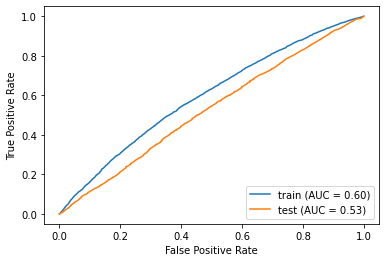

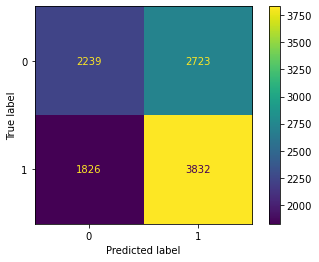

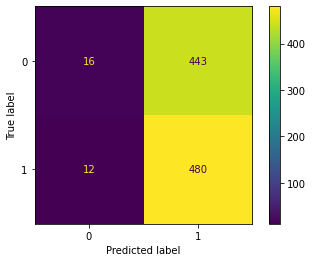

In [51]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [52]:
new_acc(probabilities)

(0.5257214554579673, 419)

Number of Neighbors: 17
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5286252354048965
Train Mean Accuracy: 0.5968926553672317
Test Mean Accuracy: 0.5184016824395373
Recall Score: 0.5630081300813008
Precision Score: 0.5326923076923077
F1 score: 0.5474308300395258


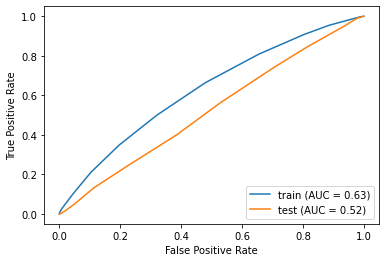

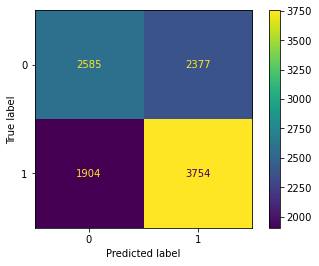

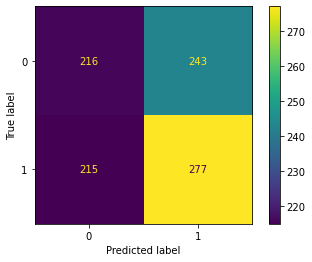

In [53]:
predictions, probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [54]:
new_acc(probabilities)

(0.5333333333333333, 208)

In [55]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.5296610169491525
Train Mean Accuracy: 0.6209981167608286
Test Mean Accuracy: 0.5383806519453207
Recall Score: 0.6219512195121951
Precision Score: 0.5474060822898033
F1 score: 0.582302568981922


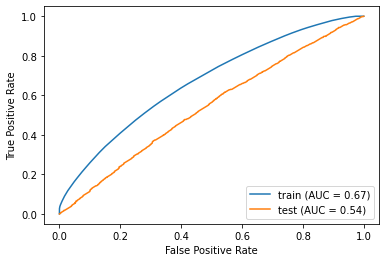

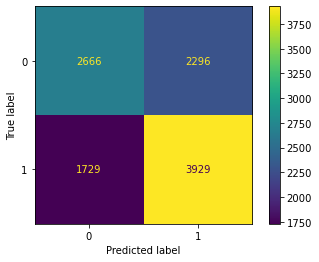

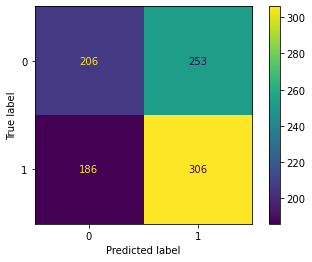

In [56]:
predictions, probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [57]:
new_acc(probabilities)

(0.5658536585365853, 116)